# Week 1 Lab: next generation sequencing and mutation hunting

## Part 1
**Due: Monday 4/8/19**

**Partner: ** (optional. Indicate which partner is turning in the assignment)

Skills covered: basic UNIX navigation, intro to NGS, sequence alignment and variant calling, python plotting

TODO: description of this week's lab
TODO: this week most commands given to you. as we go on you'll be provided less info
TODO: goal is to get through the tutorial in lab, then finish some of the end stuff at home?

## 1. Inspect raw data manually

Before running any analysis, it's a good practice to look manually at the data to make sure all the files are what you think they are. First, you should look at the sequence files to verify the format is correct. You don’t want to open the entire files, you will just do a quick inspection of the first few reads. Use the `head` command to look at the first 20 lines in the first fastq file for the child genome (`NA12878_child_1.fq`)
your file (replace [filename.format] with the actual file name).

```shell
head -n 20 [file.format]
```

Take a look at each file. Each read has 4 lines of information, and then the next read starts on the
following line. The first line starts with the "@" symbol, and contains identifiers and information about
this read. The next line contains the actual sequence, then on line three there is a "+", which may
sometimes have the identifier and info repeated. 

Line 4 contains the quality string, where ASCII characters encode the quality score for each base.
The quality score ranges from 0 to about 40; the higher the number, the greater the confidence of the
base call. To get the actual quality score, you need to figure out the value of the symbol, then subtract
33 (this is called "Sanger" scaling type, because it's the same scaling that people use with traditional
sanger sequencing). With some older Illumina data (pre version 1.8), you subtract other numbers, like
64, for more info, see: 

http://drive5.com/usearch/manual/quality_score.html

Also take a look at the second file, containing the second read in each read pair. Notice the reads are in the same order in each file. e.g. the first reads in `NA12878_child_1.fq` and in `NA12878_child_2.fq` are paired. They have identical read identifiers, with the exception of the suffix `<read id>/1` vs. `<read id>/2`.

<font color="red" size="3" style="background-color:#f2e3e5">**Question 1 (0.25 pts)**: Look at the beginning of the `NA12878_child_1.fq` file, and find the third read. What is the read identifier? What is the quality symbol for the read's first base? Look up the value associated with this ASCII symbol online. What is the probability that this base is an error?</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 1**</font>

Read ID: 

ASCII symbol:

P(error):



Now let's take a look at the human reference genome, `hg19.fa`, and introduce a new UNIX command. We can use the `cat` command to print the contents of a file to the screen. 

The reference genome is a pretty big file (3+ GB) so we don't want to look at the whole thing at once. Instead, we'll use a UNIX trick of "piping" (using the `|` symbol) which allows us to take the output of one command and use it as input to the next:

```
cat hg19.fa | head -n 10
```

This command first ran `cat` to print the file to the screen (which we call "standard output"). Then the command of `head` used the output of `cat` as its input rather than specifying a file directly as we did above. We refer to this as "standard input".

<blockquote>
**UNIX TIP**: If you accidently open (e.g. cat) a huge file and just see characters flying down your screen, matrix style, or if you think a process you are running may be stuck, you can press control+c to cancel the last command.
</blockquote>

<font color="red" size="3" style="background-color:#f2e3e5">**Question 2 (0.25 pts)**: What is the name of the first chromosome listed in the reference genome? The top of the file has a bunch of "N"'s. Why do you think that is?</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 2**</font>

We can string together a bunch of commands which can be pretty flexible. e.g. if you want look further down the file at lines 9990 through 10,000 you can do:

```
cat hg19.fa | head -n 10000 | tail -n 10
```

which prints the reference genome, takes the top (`head`) 10,000 lines, then the last (`tail`) 10 lines of that.

<font color="red" size="3" style="background-color:#f2e3e5">**Question 3 (0.25 pts)**: Write a one-line UNIX command to print out the read ID of the 100th read (and nothing else) from the file `NA12878_child_1.fq. (Hint: remember each read takes up 4 lines)</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 3**</font>

We'll introduce one more helpful UNIX command before moving on. The tool `wc` includes a helpful option to count the number of lines in a file:

```
wc -l [filename]
```

<blockquote>
If you want more details about a UNIX tool, you can try looking at the manual using `man`, e.g. `man wc -l`
</blockquote>

 <font color="red" size="3" style="background-color:#f2e3e5">**Question 4 (0.25 pts)**: Using `wc -l`, determine how many read pairs we have for each of the three samples (child, mother, and father)</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 4**</font>

## 2.  Inspect raw sequencing data with fastqc

`cd` into your home directory. Make a directory that will contain all of the data for week1, use `ls` to confirm its there, and `cd` into it.

```
mkdir week1
cd week1
```

This is where you will be working for the rest of the week.

OK, now you are ready to run `fastqc`, a simple fastq statistics analysis program. First, make sure the program is working and properly installed by typing the command below. You should see the manual page. Please ask a TA if this is not working.

```
fastqc -h
```

Run the program fastqc on the fastq files. You will have to specify the path to the `public/week1` folder, since you should leave the files there. You also have to tell `fastqc` to `-o` output the files to the current directory, which you indicate with a `.` The command to do all this is below, but you have to specify the full root path to each fastq file.

```
fastqc -o . NA12878_child_1.fq NA12878_child_2.fq NA12891_father_1.fq NA12891_father_2.fq NA12892_mother_1.fq NA12892_mother_2.fq
```

Check with `ls` that this generated some files. The html files contain the whole report. To look at them, you will need to download them to your local computer.

Open a new terminal window and use pwd and ls to find the path to the desktop. Then use "secure copy" with the command below, using the full rooted path to the html file and your local desktop. If you’re not sure of the path, just pwd while you're in the relevant directory. Copy all htmo files.

```
scp [username]@ieng6.ucsd.edu:[path to your home week 1 directory]/*.html [path to desktop]
```

You will be prompted for your cs185 password. Once the files appear on your desktop, open them and take a look. Do the basic statistics match what you calculated for the number of reads? On the left, you’ll see a navigation window with green (normal), yellow (slightly abnormal), and red (very unusual) circles for several kinds of data analysis. If you have any red circles, record them in your notebook, and read the fastqc documentation on the analysis modules to try to learn what they mean.

http://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/

Our sequencing datasets are high quality and nothing should be flagged in red, indicating we're ready to move on to sequence alignment.

<font color="red" size="3" style="background-color:#f2e3e5">**Question 5 (0.25 pts)**: Look at the "Per base sequence quality" section of the `fastqc` output for one of the files. What happens to the quality scores as you get toward the end of the read? Why?</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 5**</font>

## 3. Aligning sequences to the reference genome

To make sense out of these small sequences of DNA, we will map them to our reference sequence. Mapping works by taking each read and trying to find the closest matching sequence in the reference genome. 

There are many alignment programs ("aligners") available. The earliest alignment algorithms (Smith Waterman and Needleman-Wunsch) are still used today to compare small pieces of DNA one-by-one, but the computing power needed to map millions of short reads to genomes that are millions to billions of basepairs long requires special algorithms to speed up the process.

Today we will use an aligner called BWA-MEM, which makes use of the Burrows-Wheeler transform for reversible data compression (the reference is summarized with a special reversible index, the index makes its faster to search). BWA-MEM is optimized for ‘long’ next-generation sequencing reads of 100bp or more, which may contain several mutations, insertions, or deletions, as it works by finding the ‘maximum exact match’ within a read to the reference, rather than forcing the entire read to match.

First we need to index the reference file. This step takes a while, so it has already been done for you. We created the BWA-MEM index by running:

```
bwa index hg19.fa
```

This created several index files the program uses to rapidly search the genome. Do:
```
ls public/week1/hg19.fa*
```

to see a list of those index files.

Now we're ready to perform the alignment. We'll first look at the usage message for the tool to see how to run it. Simply type the name of the command.

```
bwa mem
```

Note the line at the top that says: 
```
Usage: bwa mem [options] <idxbase> <in1.fq> [in2.fq]
```

This tells us what we need to run. The alignment command takes inputs in this order: first, specify the path to the fasta reference genome file used to create the index. Then specify the data files in fastq format. If the data is paired end, specify both of the fastq files. (Things in square brackets are optional.)

BWA MEM outputs alignments to standard output. We can use the `>` operator to redirect the output to a file. e.g.:

```
bwa mem [options] <idxbase> <file1.fq> <file2.fq> > output.sam
```

<font color="red" size="3" style="background-color:#f2e3e5">**Question 6 (0.5 pts)**: Based on the usage information above, align all three samples to the hg19 reference genome and output the alignments for each to a SAM file with an informative filename (e.g. NA12878_child.sam) in your home directory. Paste the commands you used to do this below.</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 6**</font>

**Alignment may take a few minutes, in the mean time, read about "sam":** BWA outputs data in the "SAM" format. We will dive right in with a manual inspection of the data, but to learn more about sam, check out: https://samtools.github.io/hts-specs/SAMv1.pdf

## 4. Meet SAM, inspect the alignment

Look at first five lines of the child alignment of your new sam file with head:

```
head -n 50 NA12878_child.sam
```

The first chunk of lines beginning with `@` are part of the header. After that comes the actual alignments.

Not all reads will be successfully aligned to the reference. The SAM file contains all reads, whether they successfully aligned or not. For bioinformatics pipelines, it's important to know what fraction of your reads aligned. If there are a lot reads that failed to align, that could indicate that your DNA was contaminated with some other source, or that something went wrong with the alignment.

In the SAM format, each line (after the headers) starts with a unique read ID (name.number) in the first "field". Fields are delimited (separated) regions of data, similar to columns on a chart. Sam uses tabs as the delimiters. In later classes we might get into what all of the different fields mean (you should be able to recognize the quality string and the base string).

For now we are going to use the built in utilities of `samtools`, a program designed to read and parse sam files, to decode the samfile for us. Run the commands below to get some basis statistics.

```
samtools flagstat NA12878_child.sam
samtools flagstat NA12891_father.sam
samtools flagstat NA12892_mother.sam
```

Does the "in total" match the read count you computed earlier? What percentage are mapped? These are the two most important things here.

Next, you need to compress and sort the SAM files with the commands below. A compressed SAM file is called a BAM file. Like the reference, BAM files need to be indexed. This gets the data ready for some of the next commands we will use.

```
samtools view -S -b NA12878_child.sam > NA12878_child.bam
samtools sort NA12878_child.bam > NA12878_child.sorted.bam
samtools index NA12878_child.sorted.bam
```

Using the above as a guide, generate sorted and indexed BAM files for each family member.

Note, to view the contents of a BAM file, you cannot simply do something like `cat file.bam`, since it is a binary (not plaintext) file. Instead, use the `samtools view` command. e.g.:

```
samtools view NA12878_child.sorted.bam | head
```

If you want to view only a particular region, you can add a chromosome and position range to the command:
```
samtools view NA12878_child.sorted.bam chr6:128405804-128605805
```

Next you will visualize what the data actually looks like by using a tool called samtools tview, that converts the complicated fields in the sam format into a conventional ‘alignment’ where each read is mapped to its position on the reference.

```
samtools tview NA12878_child.sorted.bam hg19.fa
```

This will bring up a simple representation of the alignment. Press the ? key to see your options for navigation, or use the arrow keys. The reference sequence will be at the top, along with numbers indicating the genome position, and individual reads will be shown below, aligned with the part of the reference they map to. When the reads from your ampicillin resistant bacterial strain have the same base as the reference there is a dot or a comma, and when they differ, you will see the base. Press escape to exit and enter the command again. 

To navigate to a specific position, press "g" to open the Goto dialog box. Then enter coordinates in the format: chrom:position.

<font color="red" size="3" style="background-color:#f2e3e5">**Question 7 (0.25 pts)**: For the child genome, navigate to positions chr6:128414941, chr6:128415031, and chr6:128419301. Do these look like heterozygous or homozygous SNPs or indels? Now navigate to the region around chr6:128510311. You’ll find this region is pretty messy. Hypothesize what’s going on there.</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 7**</font>

## 5. Inspecting the template length distribution 

It is a good idea to do some basic quality checks on our BAM file.

Since our data is paired end, reads should be aligned in pairs, where each pair of reads aligns pretty close to each other. The distance between paired reads allows us to infer the size of the fragment that was sequenced. Here we will inspect the distribution of fragment lengths in our data.

First, we'll introduce a new UNIX command, `cut`. This command can extract different columns from a text file. e.g.:

```
cut -f 3,5 file.txt
```

will extract the 3rd and 5th columns of a tab-delimited file.

If you look back to the SAM specification, you'll see the 9th column gives the observed template length. This will be equal to 0 for reads that are not properly paired.

<font color="red" size="3" style="background-color:#f2e3e5">**Question 8 (1 pt)**: For the child genome, write and execute a one line UNIX command to extract a list of template lengths from the region chr6:128405804-128605805 to a file named `child_template_lengths.txt`. Hint: you can pipe together a `samtools view` and `cut` command and use `>` to direct output to a file. Paste your command below and give the first 5 values in the file.</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 8**</font>

Finally, we'd like to visualize the distribution of template lengths. We can do this using python. 

<font color="red" size="3" style="background-color:#f2e3e5">**Question 9 (1 pt)**: Modify and run the code in the cell below to generate a histogram of template lengths. Hint, your histogram should have a bell curve shape.

What is the median template length? After filtering outliers, what is the mean? standard deviation?</font>

<font color="blue" size="3" style="background-color:#e2e6f1">**Answer 9**</font>

Populating the interactive namespace from numpy and matplotlib


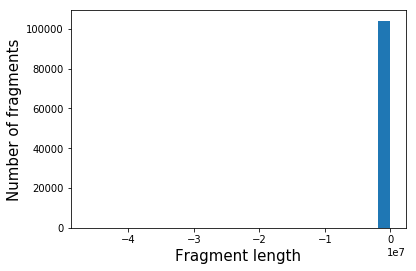

In [18]:
HOMEDIR="/home/mgymrek/workspace/cse185-spring19/1_NGS/data_prep" # TODO change

%pylab inline
import os
import numpy as np

##### FILL IN CODE BELOW ####

# Read template lengths into a list
tlens = open(os.path.join(HOMEDIR, "child_template_lengths.txt")).readlines()

# Convert items in tlens list to integers
tlens = [int(item.strip()) for item in tlens]

# TODO - take absolute values of items in tlens
# TODO - remove outliers. Recommend to remove items > 2*median(tlens)

# Plot. See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(tlens, bins=25)
plt.xlabel("Fragment length", size=15)
plt.ylabel("Number of fragments", size=15);

# TODO - print the median tlens before filtering
# TODO - print the mean and stdev of tlens after filtering